In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
df=pd.read_csv('38976_TJ-II_Mirnov_coil.TXT', sep=' ',header=None, names=('time', 'sig'))

In [3]:
a=df.loc[(df['time']>=1000) & (df['time']<=1075)] # выделяем кусок сигнала в нужном временном диапазоне

In [4]:
FD=1000/(a['time'].iloc[1]-a['time'].iloc[0])

In [5]:
spectrum = np.fft.rfft(a['sig']) #делаем фурье-спектр

In [6]:
N=len(spectrum)

75001

In [14]:
freqs=np.fft.rfftfreq(N, 1./FD) #создаем массив частот

In [15]:
freqtocheck=float(input()) # вокруг какой частоты смотреть бикогерентность

230000


In [16]:
dotstocheck=int(input()) # сколько точек вокруг этой частоты посмотреть

1000


In [17]:
k=0

In [18]:
while(freqs[k]<freqtocheck): # смотрим, в каком элементе массива находится интересующая нас частота (что-то нумпай такой возможности решил не давать)

    k+=1

In [19]:
k

8626

In [20]:
len(freqs)

37501

In [21]:
len(spectrum)

75001

In [22]:
bispectr=np.array([])
x=np.array([])
y=np.array([])
bispectrhelp=np.array([])

In [23]:
for i in range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):  #вычисляем биспектр по формуле из википедии в выделенном диапазоне
    
    for j in range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):
        
        bispectrhelp=np.append(bispectrhelp, spectrum[i]*spectrum[j]*np.conj(spectrum[i+j]))

    bispectr=np.append(bispectr,bispectrhelp)
    bispectrhelp=np.array([])

array([-1220766.17957506+4833456.82700213j,
        -931841.05293035+7992264.47903081j,
        2386328.5134321 +1204118.28251896j, ...,
         664462.04267591 +733343.26585512j,
       -1602655.72844108+1454492.91635664j,
        1398346.89130583  +37285.09422708j])

In [25]:
bispectr.shape=( k+dotstocheck-max(k-dotstocheck, 0),k+dotstocheck-max(k-dotstocheck, 0)) #делаем 2-д массив для тепловой карты

array([[-1.22076618e+06+4.83345683e+06j, -9.31841053e+05+7.99226448e+06j,
         2.38632851e+06+1.20411828e+06j, ...,
        -5.31008002e+06+4.07634358e+06j,  6.76560100e+06-1.46575753e+07j,
        -1.02295874e+07-1.13155957e+04j],
       [-9.31841053e+05+7.99226448e+06j,  4.03930688e+06+1.02636286e+07j,
         2.31357463e+06+1.19431085e+06j, ...,
        -1.36066571e+05+7.26639027e+06j, -5.64433820e+06-1.35191292e+07j,
        -6.59499474e+06+7.91823139e+06j],
       [ 2.38632851e+06+1.20411828e+06j,  2.31357463e+06+1.19431085e+06j,
         6.21053741e+05-1.65099338e+04j, ...,
         1.59738935e+06+5.27774616e+04j, -3.24978375e+06+1.49310773e+06j,
         1.44641434e+06+1.62134907e+06j],
       ...,
       [-5.31008002e+06+4.07634358e+06j, -1.36066571e+05+7.26639027e+06j,
         1.59738935e+06+5.27774616e+04j, ...,
         2.53743221e+03+7.62824966e+05j, -4.10047904e+05-5.05184613e+05j,
         6.64462043e+05+7.33343266e+05j],
       [ 6.76560100e+06-1.46575753e+07j, -5.

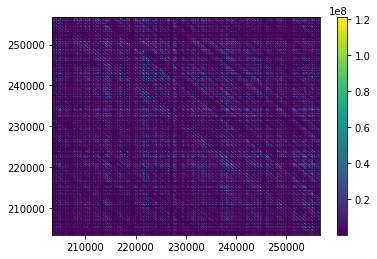

In [35]:
x=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])
y=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])

fig, axes=plt.subplots()
image=axes.pcolormesh(x, y, np.abs(bispectr))
fig.colorbar(image)
